<a href="https://colab.research.google.com/github/faustofcjr/artificial-intelligence/blob/develop/udemy/tensorflow-2.0/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix

import tensorflow as tf

### load de data

In [2]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


### Build the model

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

### Compile the model

In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Train the model

In [6]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2925 - accuracy: 0.9150 - val_loss: 0.1441 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9581 - val_loss: 0.0967 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9672 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9741 - val_loss: 0.0774 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9762 - val_loss: 0.0731 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9786 - val_loss: 0.0710 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0765 - val_accuracy:

### Plot the loss per iteration

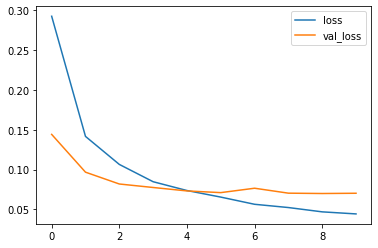

In [8]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

### Plot accuracy per iteration

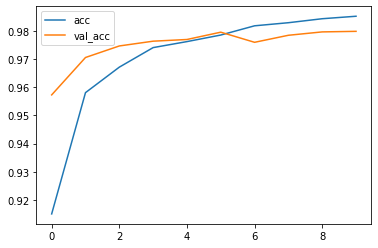

In [9]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

### Evaluate the model

In [10]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9799
[0.07019390165805817, 0.9799000024795532]


### Plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Bues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`
  """
  if normalize:
    cm = cm.astype("foat") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else "d"

  thresh = cm.max() / 2.
